In [2]:
import time
import json
import cv2
import detector
import mediapipe as mp
from mediapipe import ImageFormat
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt
from mediapipe.tasks.python.vision import FaceLandmarkerResult
%matplotlib inline

In [3]:
cap = cv2.VideoCapture(0)

In [4]:
width= int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height= int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(width)
print(height)

640
480


In [5]:
counter = 0

In [6]:
modelPath = "face_landmarker.task"
baseOptions = mp.tasks.BaseOptions
faceLandmarker = mp.tasks.vision.FaceLandmarker
faceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
visionRunningMode = mp.tasks.vision.RunningMode
blendshape_result = mp.tasks.vision.FaceLandmarkerResult

In [7]:
options = faceLandmarkerOptions(
    base_options=baseOptions(model_asset_path=modelPath),
    running_mode=visionRunningMode.IMAGE)

landmarker = faceLandmarker.create_from_options(options)

In [8]:
image_data = cv2.imread("opencv_frame_0.png")
image = mp.Image(image_format=ImageFormat.SRGB, data=image_data)

faceLandmarkerResult = detector.getResult(image)


In [9]:
face_landmarks_list = faceLandmarkerResult.face_landmarks
face_landmarks = face_landmarks_list[0]

face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
face_landmarks_proto.landmark.extend([
    landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    # landmark_pb2.NormalizedLandmark(x=0.5567506551742554, y=0.6552361845970154, z=-0.04235226660966873)
])

def draw(annotatedImage):
    solutions.drawing_utils.draw_landmarks(
        image=annotatedImage,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())

    # solutions.drawing_utils.draw_landmarks(
    #     image=annotatedImage,
    #     landmark_list=face_landmarks_proto,
    #     connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
    #     landmark_drawing_spec=None,
    #     connection_drawing_spec=mp.solutions.drawing_styles
    #     .get_default_face_mesh_contours_style())
    
    # solutions.drawing_utils.draw_landmarks(
    #     image=annotatedImage,
    #     landmark_list=face_landmarks_proto,
    #     connections=mp.solutions.face_mesh.FACEMESH_IRISES,
    #       landmark_drawing_spec=None,
    #       connection_drawing_spec=mp.solutions.drawing_styles
    #       .get_default_face_mesh_iris_connections_style())    
    return annotatedImage


annotatedImage = draw(image_data)

In [134]:
count = int(0)
image_data = cv2.imread("opencv_frame_0.png")

leftEye = {
    "name": "left_eye",
    "id": [7, 22, 23, 24, 25, 26, 27, 28, 29, 30, 144, 145, 158, 159, 160],
    "coord": []
}
rightEye = {
    "name": "right_eye",
    "id": [252, 253, 254, 255, 257, 258, 259, 260, 373, 374, 385, 386, 387, 408],
    "coord": []
}
mouth = {
    "name": "mouth",
    "id": [0, 13, 14, 15, 16, 17, 39, 40, 41, 42, 64, 72, 73, 74, 77, 84, 86, 91, 146, 161, 185, 269, 270, 271, 272, 291, 292, 312, 314, 316, 318, 319, 320, 321, 375, 407, 409],
    "coord": []
}
other = {
    "name": "other",
    "id": [],
    "coord": []
}

drawed: 7
[0.5593414902687073, 0.53420090675354]


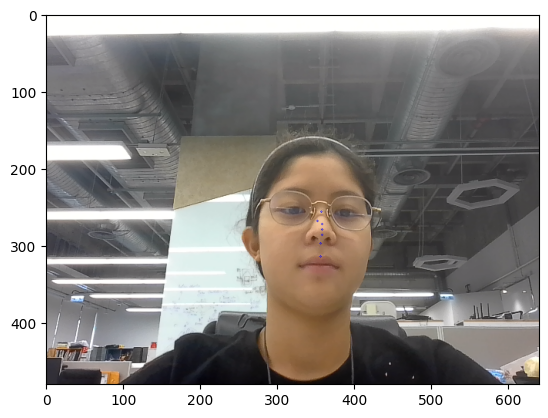

In [141]:
face = [[i.x, i.y] for i in face_landmarks]
for i in face[:count+1]:
    annotatedImage = cv2.circle(image_data, [int(i[0]*width), int(i[1]*height)], 1, (255,0,0), 1)
count +=1
print(f"drawed: {count}")
print(i)

if (leftEye["id"].count(count)) > 0:
    leftEye["coord"].append(face[count])
elif (rightEye["id"].count(count)) > 0:
    rightEye["coord"].append(face[count])
elif (mouth["id"].count(count)) > 0:
    mouth["coord"].append(face[count])
else:
    other["id"].append(count)
    other["coord"].append(face[count])

# annotatedImage = cv2.circle(image_data, [int(face[411][0]*width), int(face[411][1]*height)], 1, (255,0,0), 1)
# print(face[411])

annotatedImage = cv2.cvtColor(annotatedImage, cv2.COLOR_BGR2RGB)
plotImage = plt.imshow(annotatedImage)
plt.show()  

In [142]:
print(other)

{'name': 'other', 'id': [2, 3, 4, 5, 6], 'coord': [[0.5576716065406799, 0.620285153388977], [0.5507659316062927, 0.5585035681724548], [0.5603040456771851, 0.5829789638519287], [0.5601763129234314, 0.5678576827049255], [0.5593414902687073, 0.53420090675354]]}


In [149]:
with open('point.json', 'w') as json_file:
    json.dump({
        "left_eye": leftEye,
        "right_eye": rightEye,
        "mouth": mouth,
        "other": other
    }, json_file)
    # json.dump(leftEye, json_file)
    # json.dump(rightEye, json_file)
    # json.dump(mouth, json_file)
    # json.dump(other, json_file)

In [132]:
print(face.count([0.4911700487136841, 0.5469110012054443]))

1


In [12]:
'''
Left eye: 7 [0.48293036222457886, 0.533580482006073] leftmost point
[0.5011002421379089, 0.5469486713409424]
[0.5111006498336792, 0.5459397435188293]
[0.4779866635799408, 0.5402441024780273]
[0.5196382403373718, 0.5430974960327148]
bottom of eyelid
[0.4976576268672943, 0.5036427974700928]
[0.5090042948722839, 0.5059887170791626]
[0.4866258203983307, 0.5061912536621094]
[0.47921741008758545, 0.512554407119751]
top of eyelid
[0.5010366439819336, 0.5382893085479736]
bottom of eye
[0.4996933937072754, 0.5205805897712708]
top of eye

'''
'''
Right eye: [0.4996933937072754, 0.5205805897712708] rightmost point
[0.598922848701477, 0.55221027135849]
[0.6080399751663208, 0.5544919967651367]
[0.6170852184295654, 0.5552515983581543]
[0.6281967759132385, 0.5508613586425781]
bottom of eyelid
[0.6132441163063049, 0.5122324824333191]
[0.6027255654335022, 0.513066828250885]
[0.6231802701950073, 0.5161007642745972]
[0.6294776797294617, 0.5233538746833801]
top of eyelid
[0.6087080240249634, 0.5460096597671509]
bottom of eye
[0.6099792718887329, 0.5287600159645081]
top of eye
'''
'''
Mouth: [0.5567506551742554, 0.6552361845970154] topmost point
[0.5557494163513184, 0.6759945750236511] center point
[0.555812418460846, 0.6764163970947266]
[0.5557176470756531, 0.6824916005134583]
[0.5556355714797974, 0.6907180547714233]
[0.5670006275177002, 0.6710270047187805]
[0.5880633592605591, 0.6703909635543823]
[0.5758101344108582, 0.6739064455032349]
upper center line
[0.5551302433013916, 0.6995164752006531]
bottommost point
[0.5301879048347473, 0.6591161489486694]
[0.5215741991996765, 0.6676972508430481]
[0.5692622661590576, 0.6526031494140625]
[0.5809166431427002, 0.661418616771698]
upper line
[0.5346583724021912, 0.6720568537712097]
[0.5265358686447144, 0.675310492515564]
middle line
[0.5245627760887146, 0.6120284795761108]
leftmost point
[0.5440563559532166, 0.6610193252563477]
[0.5326704382896423, 0.6659799218177795]
[0.524109959602356, 0.6712355017662048]
[0.5655465722084045, 0.6765314936637878]
upper middle line
[0.5176815390586853, 0.6833646297454834]
second leftmost point
[0.5424333214759827, 0.698234498500824]
[0.5219011902809143, 0.6901575326919556]
[0.47416484355926514, 0.4529489278793335]
[0.5676378011703491, 0.6989321112632751]
[0.5880509614944458, 0.6811178922653198]
bottom line
[0.5431850552558899, 0.6892267465591431]
[0.525307834148407, 0.7123300433158875]
[0.5675094723701477, 0.6902063488960266]
[0.5846031904220581, 0.6875660419464111]
bottom middle line
[0.5441862940788269, 0.6817123293876648]
[0.5219721794128418, 0.605722188949585]
[0.5669296383857727, 0.6823158264160156]
bottom center line
[0.5154933333396912, 0.6753515005111694]
[0.503957986831665, 0.6658565998077393]
left corners
[0.5925856232643127, 0.6843816637992859]
rightmost point

'''

'\nMouth: [0.5567506551742554, 0.6552361845970154] topmost point\n[0.5557494163513184, 0.6759945750236511] center point\n[0.555812418460846, 0.6764163970947266]\n[0.5557176470756531, 0.6824916005134583]\n[0.5556355714797974, 0.6907180547714233]\n[0.5670006275177002, 0.6710270047187805]\n[0.5880633592605591, 0.6703909635543823]\n[0.5758101344108582, 0.6739064455032349]\nupper center line\n[0.5551302433013916, 0.6995164752006531]\nbottommost point\n[0.5301879048347473, 0.6591161489486694]\n[0.5215741991996765, 0.6676972508430481]\n[0.5692622661590576, 0.6526031494140625]\n[0.5809166431427002, 0.661418616771698]\nupper line\n[0.5346583724021912, 0.6720568537712097]\n[0.5265358686447144, 0.675310492515564]\nmiddle line\n[0.5245627760887146, 0.6120284795761108]\nleftmost point\n[0.5440563559532166, 0.6610193252563477]\n[0.5326704382896423, 0.6659799218177795]\n[0.524109959602356, 0.6712355017662048]\n[0.5655465722084045, 0.6765314936637878]\nupper middle line\n[0.5176815390586853, 0.6833646

In [57]:
print(face[24])

[0.4911700487136841, 0.5469110012054443]
